<img align="left" src="https://drive.google.com/uc?export=view&id=1orv1XTixxkcGADz18uSwN_5kCtd1yM7q" alt="drawing" width="100%"/>

<img align="left" src="https://drive.google.com/uc?id=1dUhDyLOrHHP0ghjdb2ZhvyQZ0ZpcmoIm" alt="drawing" width="200"/> **<font color = 2b2b99 face="Times New Roman" size=7>L'extraction de caractéristiques (Solutions)</font>**

L'objectif de ce tutoriel est de vous présenter comment faire la tâche d'extraction de caractéristiques dans le cas :


*   Des données images;
*   Des données du langage :
  *  Les données textuelles;
  *  Les données vocales.


Tout ceci sera fait avec les bibliothèques *scikit learn*, *librosa* et *skimage*.





# <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> **<font color = "3832ba" face="Times New Roman" size=6>Les données du langage</font>**

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Les données textuelles</font>

Nous allons utiliser un corpus, qui est un ensemble de documents, afin de faire les représentations suivantes :
* Binaires;
* La fréquence des termes; 
* La fréquence des termes - fréquence de document inverse (TF-IDF : *Term frequency - inverse document frequency*).

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Corpus</font>



> Dans un corpus, il y a les notions importantes suivantes :
* Les jetons (*tokens*) qui sont les mots non distincts dans un corpus.
* Les *types* qui sont les mots distincts dans un corpus, ils ne sont donc pas répétés.
* Le *vocabulaire* qui est constitué de tous les types.
* Le nombre total de mots dans un corpus qui est le nombre de jetons que nous allons appeler N.
* La taille du vocabulaire qui est le nombre de types que nous allons appeler taille_vocabulaire. 



In [ ]:
Doc1 = 'Mon nom est Document; mon prénom et mon surnom sont : Premier.'
Doc2 = 'Mon nom est Document; mon prénom et mon surnom sont : Deuxième.'
Doc3 = 'Mon nom est Document; mon prénom et mon surnom sont : Troisième.'
Doc4 = 'Mon nom est Document; mon prénom et mon surnom sont : Quatrième.'

corpus = [Doc1, Doc2, Doc3, Doc4]



### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Représentation binaire</font>





> Ici, on aura une matrice document-type avec uniquement les valeurs 0 et 1 pour indiquer quel type se trouve dans un document. Nous allons approfondir le sujet plus bas.



In [ ]:
## Nous allons extraire les jetons et les fréquences des mots à l'aide de la fonction CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_binaire = CountVectorizer(binary=True) # binary = True est pour tenir compte de la représentation binaire

'''
1. Extrayons le vocabulaire;
2. La matrice de document-type;
3. Mettons cette matrice sous une forme plus compréhensible.
'''

# Permet d'apprendre le vocabulaire du corpus
X_binaire = vectorizer_binaire.fit_transform(corpus) 

vocabulaire = vectorizer_binaire.get_feature_names_out()
taille_vocabulaire = len(vocabulaire)

print('\n************************************************************')
print(f"La taille du vocabulaire est de {taille_vocabulaire}.")
print('************************************************************\n')

# Matrice document-type 
document_type_binaire = X_binaire.toarray()


# Pour plus de clarté, on va mettre cette matrice sous la forme d'un tableau 
# avec le nom des lignes et des colonnes en utilisant la librairie Pandas :
#   - le nom des colonnes sera celui dans le vocabulaire;
#   - le nom des lignes sera celui des documents.
import pandas as pd
data_binaire = pd.DataFrame(document_type_binaire, 
                                     columns=vocabulaire, 
                                     index=['Doc1', 'Doc2', 'Doc3', 'Doc4']) 

data_binaire


************************************************************
La taille du vocabulaire est de 12.
************************************************************



deuxième  document  est  et  ...  quatrième  sont  surnom  troisième
Doc1         0         1    1   1  ...          0     1       1          0
Doc2         1         1    1   1  ...          0     1       1          0
Doc3         0         1    1   1  ...          0     1       1          1
Doc4         0         1    1   1  ...          1     1       1          0

[4 rows x 12 columns]



> * Dans Doc1, le mot « mon » apparait trois (3) fois, mais ici, on ne le voit qu'une fois, car la représentation binaire est de 0 (il n'apparait pas) ou 1 (il apparait).
* Le vocabulaire est bel et bien constitué de 12 mots. (Ce sont les noms des colonnes.)








### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Représentation en termes de fréquences</font>





> Ici, on aura une matrice document-type avec uniquement les fréquences des mots du vocabulaire dans le document.



In [ ]:
vectorizer_frequence = CountVectorizer(binary=False) #Ici on ne veut plus le binaire, mais les fréquences.

'''
1. Extrayons le vocabulaire;
2. La matrice de document-type;
3. Mettons cette matrice sous une forme plus compréhensible.
'''

# Permet d'apprendre le vocabulaire du corpus
X_frequence = vectorizer_frequence.fit_transform(corpus) 

# Matrice document-type 
document_type_frequence = X_frequence.toarray()

# Pour plus de clarté, on va mettre cette matrice sous forme d'un tableau 
# comme dans la représentation binaire.

data_frequences = pd.DataFrame(document_type_frequence, 
                                     columns=vocabulaire, 
                                     index = ['Doc1', 'Doc2', 'Doc3', 'Doc4']) 

data_frequences

deuxième  document  est  et  ...  quatrième  sont  surnom  troisième
Doc1         0         1    1   1  ...          0     1       1          0
Doc2         1         1    1   1  ...          0     1       1          0
Doc3         0         1    1   1  ...          0     1       1          1
Doc4         0         1    1   1  ...          1     1       1          0

[4 rows x 12 columns]



> * Dans Doc1, le mot « mon » apparait trois (3) fois et on le voit maintenant dans le tableau.






### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Représentation en TF-IDF</font>





> Ici, on a des mots qui sont fortement représentés comme « mon », mais qui apportent peu d'informations. Si on veut savoir, par exemple, ce qui différencie (le terme statistique est ***discriminer***) les différents documents, cela nous aide peu. Parfois, on peut avoir dans un corpus beaucoup de « le », « les » et « de » (toutes prépositions) qui  apportent peu d'informations, et c'est pour cela qu'on va faire appel à la représentation TF-IDF telle qu'elle est expliquée dans les vidéos.



In [ ]:
# On va importer la fonction TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

'''
1. Extrayons le vocabulaire;
2. La matrice de document-type;
3. Mettons cette matrice sous une forme plus compréhensible.
'''

# Permet d'apprendre le vocabulaire du corpus
X_tfidf = vectorizer_tfidf.fit_transform(corpus) 

# Matrice document-type 
document_type_tfidf = X_tfidf.toarray()

# Pour plus de clarté, on va mettre cette matrice sous la forme d'un tableau 
# comme dans la représentation binaire.

data_tfidf = pd.DataFrame(document_type_tfidf, 
                                     columns=vocabulaire, 
                                     index = ['Doc1', 'Doc2', 'Doc3', 'Doc4']) 

# Pour arrondir les valeurs décimales à trois (3) chiffres après la virgule, on va utiliser
# la fonction round de numpy.
import numpy as np
np.round(data_tfidf, 3)

deuxième  document    est     et  ...  quatrième   sont  surnom  troisième
Doc1     0.000     0.225  0.225  0.225  ...      0.000  0.225   0.225      0.000
Doc2     0.432     0.225  0.225  0.225  ...      0.000  0.225   0.225      0.000
Doc3     0.000     0.225  0.225  0.225  ...      0.000  0.225   0.225      0.432
Doc4     0.000     0.225  0.225  0.225  ...      0.432  0.225   0.225      0.000

[4 rows x 12 columns]



> Dans Doc1, le mot « mon » qui apparaissait trois (3) fois a vu sa valeur diminuer à cause de la pondération.

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Les données vocales</font>

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Musique de ABCDEFG</font>



> Ici, j'ai téléchargé un son : celui de ABCDEFG [2] et je vais extraire ses caractéristiques. 



In [ ]:
## Installation de la librairie librosa.

!pip install librosa
import librosa



> Le fichier audio utilisé s'appelle « ABC.wav » [2]. Pour l'importer dans l'espace de travail de votre Google Colab, on le télécharge ici :
<!-- * Aller sur le côté gauche de votre google colab et cliquer sur l'icône image.png
* ensuite cliquer sur  image.png 
* Aller dans le dossier où vous avez mis le fichier 'ABC.wav' que nous vous avons fini et choisissez ce fichier. -->

In [ ]:
# Télécharger ABC.wav
import requests
audio = requests.get('https://drive.google.com/uc?export=view&id=1FNpwJYR3UAM1Ghzvg5CoDQERBknpybD7')
with open('ABC.wav', 'wb') as f:
    f.write(audio.content)

In [ ]:
### On va aussi importer IPython.display pour lire l'audio.
import IPython.display as ipd
ipd.Audio('ABC.wav')



> Souvenez-vous que la fréquence d'échantillonnage (*sampling_rate*) a été discutée dans la vidéo sur l'extraction des caractéristiques pour la voix.


In [ ]:
## Charger l'audio
echantillons, sampling_rate = librosa.load('ABC.wav')

print('------------------------ * ------------------------------')
print(f'Le nombre d\'échantillons dans le fichier audio est {len(echantillons)}')
print('------------------------ * ------------------------------')

print('*********************************************************')

print('------------------------ * ------------------------------')
print(f'La frequence d\'échantillonnage {sampling_rate}')
print('------------------------ * ------------------------------')

------------------------ * ------------------------------
Le nombre d'échantillons dans le fichier audio est 983297
------------------------ * ------------------------------
*********************************************************
------------------------ * ------------------------------
La frequence d'échantillonnage 22050
------------------------ * ------------------------------


Text(0, 0.5, 'Amplitude')

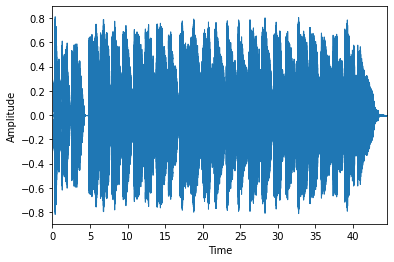

In [ ]:
## Représentation de l'onde sonore à l'aide de la librairie matplotlib.pyplot
import matplotlib.pyplot as plt
import librosa.display

plt.figure() # créer une nouvelle figure
librosa.display.waveplot(y=echantillons, sr=sampling_rate)
plt.xlabel("Time") # nom de l'axe des abscisses
plt.ylabel("Amplitude") # nom de l'axe des ordonnées

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Extraction de caractéristiques</font>



[Text(0.5, 1.0, 'MFCC')]

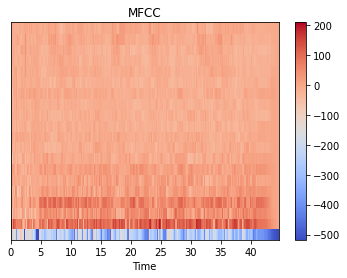

In [ ]:
## Nous allons utiliser la fonction feature.mfcc de librosa pour extraire 
## nos caractéristiques.

mfcc = librosa.feature.mfcc(echantillons, sr=sampling_rate)

# Nous allons visualiser nos caractéristiques.
fig, ax = plt.subplots() # On crée la figure
img = librosa.display.specshow(mfcc, x_axis='time', ax = ax) 
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [ ]:
# Si on veut voir les valeurs de ces caractéristiques.
mfcc

array([[-5.1774213e+02, -5.1503381e+02, -4.9202658e+02, ...,
        -5.1774213e+02, -5.1774213e+02, -5.1757617e+02],
       [ 0.0000000e+00,  3.5102906e+00,  3.0704052e+01, ...,
         0.0000000e+00,  0.0000000e+00,  2.3464295e-01],
       [ 0.0000000e+00,  2.8268933e+00,  1.9225670e+01, ...,
         0.0000000e+00,  0.0000000e+00,  2.3458947e-01],
       ...,
       [ 0.0000000e+00, -1.1195986e+00, -2.2022846e+00, ...,
         0.0000000e+00,  0.0000000e+00,  2.2957256e-01],
       [ 0.0000000e+00, -1.4441293e+00, -3.4899442e+00, ...,
         0.0000000e+00,  0.0000000e+00,  2.2895840e-01],
       [ 0.0000000e+00, -2.0124621e+00, -7.7112455e+00, ...,
         0.0000000e+00,  0.0000000e+00,  2.2831070e-01]], dtype=float32)

# <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> **<font color = "3832ba" face="Times New Roman" size=6>Les données images</font>**

> Cas des données images. Nous utiliserons la librairie *Skimage* et aborderons du :
* Redimensionnement;
* De la mise à l'échelle;
* De l'augmentation des données.
        Tous ces termes vous seront expliqués plust tard. 




## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Exploration de l'image</font>

<!-- >   Nous allons importer l'image fournie (Eiffel.jpg [3]) avec ce tutoriel dans l'espace de travail de google colab :
* Aller sur le côté gauche de votre google colab et cliquer sur l'icône image.png
* ensuite cliquer sur  image.png 
* Aller dans le dossier où vous avez mis le fichier 'Eiffel.jpg' que nous vous avons fini et choisissez ce fichier. -->
Nous allons télécharger l'image : Eiffel.jpg


In [ ]:
# Télécharger l'image Eiffel.jpg à partir de Wikipédia
import urllib.request
imgURL = "https://upload.wikimedia.org/wikipedia/commons/5/55/La_Tour_Eiffel_surplombant_Paris.jpg"
urllib.request.urlretrieve(imgURL, "Eiffel.jpg")

('Eiffel.jpg', <http.client.HTTPMessage at 0x7f5696e87cd0>)



------------------------ * ------------------------------
Les dimensions de cette image sont 2000x3008
------------------------ * ------------------------------




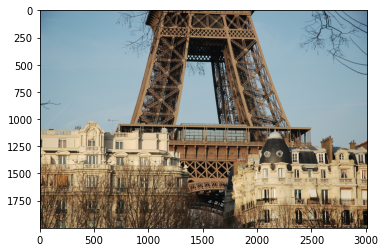

In [ ]:
# Chargement de l'image. On utilisera la fonction imread de matplotlib.pyplot
import matplotlib.pyplot as plt


eiffel = plt.imread('Eiffel.jpg') # lecture de l'image
plt.imshow(eiffel) # affichage de l'image

print('\n\n------------------------ * ------------------------------')
print(f'Les dimensions de cette image sont {eiffel.shape[0]}x{eiffel.shape[1]}')
print('------------------------ * ------------------------------\n\n')

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Redimensionnement</font>

>  
* Les dimensions de l'image ici sont de 2000 pixels sur 3008 pixels. Certains algorithmes d'apprentissage ont besoin d'images plus petites pour faire, par exemple, de la classification (comme de définir si la tour Eiffel se trouve ou non sur image). 
* Ainsi, on va donc **redimensionner**.
* Un avantage du redimensionnement est de gagner du temps et de la puissance de calcul lors de l'entraînement de nos modèles si nous redimensionnons, par exemple, en des tailles plus petites [4].



------------------------ * ------------------------------
Les dimensions de l'image redimensionnée sont 200x200
------------------------ * ------------------------------




Text(0.5, 1.0, 'Après redimensionnement')

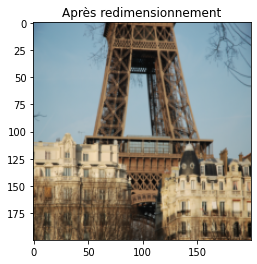

In [ ]:
# Supposons que l'on veuille redimensionner en des tailles de 200x200
# On va utiliser la fonction resize de skimage.transform
import skimage
from skimage.transform import resize

eiffel_resized = resize(eiffel, (200, 200))

print('\n\n------------------------ * ------------------------------')
print(f'Les dimensions de l\'image redimensionnée sont {eiffel_resized.shape[0]}x{eiffel_resized.shape[1]}')
print('------------------------ * ------------------------------\n\n')

plt.imshow(eiffel_resized)
plt.title('Après redimensionnement') # On met le titre

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>La mise à l'échelle</font>



>   
* Parfois, il est important de mettre à l'échelle une image (*scaling*) pour éviter que certaines caractéristiques aient plus de poids que d'autres à cause de leur valeur. 
* Prenons le cas d'un ensemble de données sur des personnes âgées avec les caractéristiques *taille* (m) et *âge*. La taille peut varier de 0 à 2 mètres, mais l'âge de 65 à 100 ans. Ici, la caractéristique *âge* pourrait avoir plus de poids dans l'analyse vu ses grandes valeurs. Raison pour laquelle, on doit mettre à l'échelle.
* Une façon de mettre à l'échelle est de soustraire à une caractéristique sa moyenne et de la diviser par son écart type.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, "Image après mise à l'échelle")

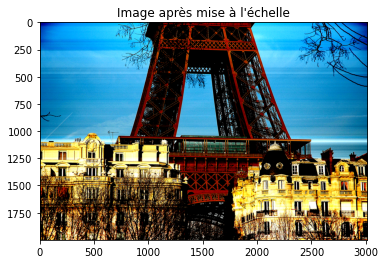

In [ ]:
# On va faire appel aux fonctions mean (moyenne) et std (écart type) de
# numpy
import numpy as np

mean_eiffel = np.mean(eiffel, axis=(1,2), keepdims=True) 
std_eiffel = np.std(eiffel, axis=(1,2), keepdims=True)

eiffel_scaled = (eiffel - mean_eiffel)/std_eiffel

plt.imshow(eiffel_scaled)
plt.title('Image après mise à l\'échelle')

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Augmentation de données</font>



> Dans le domaine des réseaux de neurones, on a besoin de beaucoup de données. Il peut donc y avoir des projets qui en manque, mais il est possible de chercher à augmenter artificiellement les données en procédant à des opérations comme : 
* Faire la rotation de l'image;
* Rogner l'image;
* Flouter l'image;
* Etc.

Cela permettra d'avoir plusieurs autres images à partir d'une seule et d'agrandir ainsi le nombre d'exemples dans l'ensemble d'entraînement.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Image flouttée')

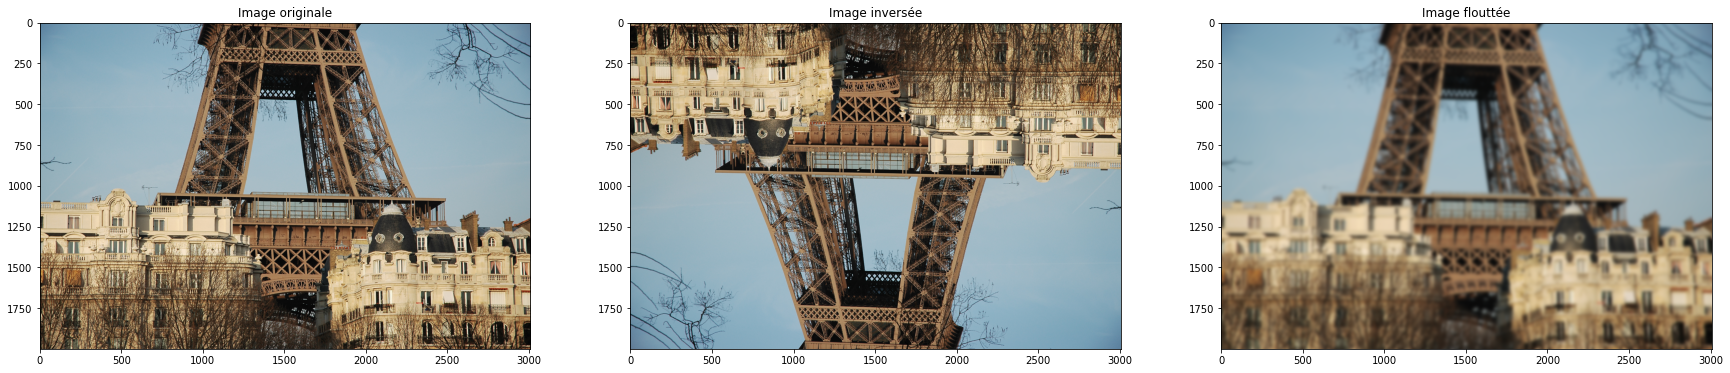

In [ ]:
'''
On va utiliser des fonctions de :
1. Skimage.transform.rotate pour la rotation;
2. Gaussian de la librairie filters de skimage pour flouter.
'''

from skimage import filters

eiffel_inversee = skimage.transform.rotate(eiffel, 180) # rotation de 180 degrés
eiffel_floutee = filters.gaussian(eiffel, 10) # pour flouter

fig, ax = plt.subplots(ncols=3, figsize = (30, 6)) # on subdivise la fenêtre d'affichage des images en trois (3) colonnes et on donne les dimensions de la fenêtre 

ax[0].imshow(eiffel) # Sur la 1re fenêtre, on représente l'image originale
ax[0].set_title('Image originale') # titre

ax[1].imshow(eiffel_inversee) # Sur la 2e fenêtre, on représente l'image inversée
ax[1].set_title('Image inversée') # titre

ax[2].imshow(eiffel_floutee) # Sur la 3e fenêtre, on représente l'image floutée
ax[2].set_title('Image floutée') # titre

#  <font color = "3832ba" face="Times New Roman" size=7>Références</font>

1. https://scikit-learn.org/stable/modules/feature_extraction.html 
2. https://www.youtube.com/watch?v=0fw3l1z9CUQ 
3. https://commons.wikimedia.org/wiki/File:La_Tour_Eiffel_surplombant_Paris.jpg
4. https://towardsdatascience.com/fast-feature-engineering-in-python-image-data-5d3a8a7bf616